In [15]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\user\anaconda3\envs\machinel2\lib\site-packages (0.0)


In [16]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Read the CSV and Perform Basic Data Cleaning

In [18]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


<AxesSubplot:>

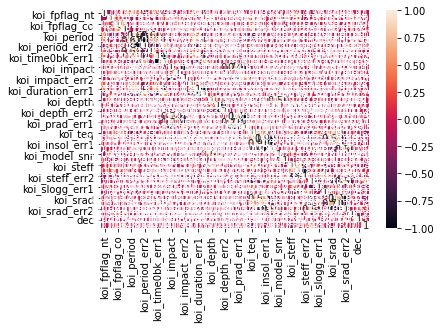

In [19]:
# data exploration 
sns.heatmap(df.corr(), annot =True)

# Select your features (columns)

In [20]:
df = df[['koi_disposition','koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
    'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']]

In [21]:
test_data = df.loc[df['koi_disposition'] =='CANDIDATE']
test_data.head() 

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
29,CANDIDATE,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263
47,CANDIDATE,40.419504,173.564690,0.911,3.36200,6256.0,7.51,467,11.29,36.9,1,5446,4.507,0.781,294.31686,50.080231,15.487
50,CANDIDATE,7.240661,137.755450,1.198,0.55800,556.4,19.45,734,68.63,13.7,2,5005,4.595,0.765,293.83331,50.230350,15.334
51,CANDIDATE,3.435916,132.662400,0.624,3.13300,23.2,0.55,1272,617.61,8.7,3,5779,4.339,1.087,287.88733,46.276241,12.791
59,CANDIDATE,1.626630,169.820171,1.260,2.11450,1620.6,32.43,1547,1355.88,103.6,1,5735,4.410,0.973,294.36819,38.310280,15.279


In [22]:
array = ['CONFIRMED', 'FALSE POSITIVE']
train_data =df.loc[df['koi_disposition'].isin(array)]
train_data.head()

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


# Select the Predictor feature and select the target variable

In [23]:
# Assign X (data) and y (target)
X = train_data.drop("koi_disposition", axis=1)
y = train_data["koi_disposition"]
print(X.shape, y.shape)

(5304, 16) (5304,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train and Model fitting (Logistic Regression)

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [26]:
classifier.fit(X_train, y_train)

C:\Users\user\Anaconda3\envs\machinel2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Quantify our Trained Model

In [27]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.834841628959276
Testing Data Score: 0.8310708898944194


# Prediction

In [28]:
predictions = classifier.predict(X_test)

In [29]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,CONFIRMED
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1321,CONFIRMED,CONFIRMED
1322,CONFIRMED,CONFIRMED
1323,FALSE POSITIVE,FALSE POSITIVE
1324,FALSE POSITIVE,FALSE POSITIVE


In [30]:
# Assign X (data) and y (target)
Xa = test_data.drop("koi_disposition", axis=1)
ya = test_data["koi_disposition"]
print(Xa.shape, ya.shape)

(1687, 16) (1687,)


In [31]:
predictions = classifier.predict(Xa)

In [32]:
pd.DataFrame({"Prediction": predictions, "Actual": ya}).reset_index(drop=True)

,Prediction,Actual
0,FALSE POSITIVE,CANDIDATE
1,CONFIRMED,CANDIDATE
2,FALSE POSITIVE,CANDIDATE
3,CONFIRMED,CANDIDATE
4,FALSE POSITIVE,CANDIDATE
...,...,...
1682,CONFIRMED,CANDIDATE
1683,CONFIRMED,CANDIDATE
1684,FALSE POSITIVE,CANDIDATE
1685,FALSE POSITIVE,CANDIDATE


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [152]:
classifier_log = LogisticRegression()

In [153]:
parameter = [
{'penalty':['l1','l2','elasticnet','none'],
'C': np.logspace(-4,4,20),
'solver':['lbfgs', 'newton-cg','liblinear','sag','saga'],
'max_iter':[100,1000,2500,5000]
}
]

In [154]:
# Create the GridSearchCV model
#Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV


In [155]:
classifier_m = GridSearchCV(classifier_log, parameter, cv = 3, verbose= True, n_jobs = -1)

In [156]:
# Train the model with GridSearch
best_classifier = classifier_m.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 2132 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 2854 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 3628 tasks      | elapsed: 83.2min
[Parallel(n_jobs=-1)]: Done 4510 tasks      | elapsed: 135.3min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 156.2min finished
C:\Users\user\Anaconda3\envs\machinel2\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\user\Anaconda3\envs\machinel2\lib\site-pack

In [159]:
best_classifier.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, penalty='none', solver='newton-cg')

In [161]:
print(f'Accuracy-:{best_classifier.score(X_train,y_train):.3f}')

Accuracy-:0.858


In [162]:
print(best_clf.best_params_)


{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}


In [163]:
print(best_classifier.best_score_)

0.8572146807440925
